<a href="https://colab.research.google.com/github/xslittlemaggie/Machine-Learning-Projects/blob/master/User_Purchase_Prediction_LR_RF_XGBoosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center> LendingClub Loan Data Analysis & Model Building Report </center></h1>

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 24px">
    <ol>
        <li><a href="#purpose of the study">Project Understanding</a></li>
        <li><a href="#loading_data">Data Loading</a></li>
        <li><a href="#features exploratory">Data Exploratory</a></li>
        <li><a href="#data preprocessing">Data Preprocessing & Feature Engineering</a></li>
        <li><a href="#model building">Model Buildings</a></li>
        <li><a href="#conclusion">Conclusion</a></li>
    </ol>
</div>
<br>
<hr>

# 0: Import libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode


# 1. Project Understanding

**1. The Purpose：**

The purpose of this project is to analyze the features related to the loan risks and create classification models to detect the fraud in loan. 

**2. The Data:**

The LendingClub dataset loaded from Kaggle competition will be used for this project. 

The raw dataset includes 42538 samples and 145 features, which is large enough for data analysis. 

**3. The models:**

(1). Logistic Regression: Easy understanding

(2). Decision Tree: Easy understanding and comprehensible

(3). Random Forest: Complex, could be more accurate, but less comprehensible

(4). xgboosting: One of the boosting ensembling method

# 2. Load dataset from Kaggle

In [0]:
import os

os.environ['KAGGLE_USERNAME'] = "liulihuang" # username from the json file 
os.environ['KAGGLE_KEY'] = "7adfc6c4e6c5eec087031fbb7397aee5" # key from the json file (This key is incorrect) 

In [0]:
!pip install -q kaggle
!kaggle datasets list -s lending-club-loan-data  # It will list the 20 datasets including "lending-club-loan-data" from kaggle
!kaggle datasets download -d balaji1994/lending-club-loan-data -p /content/
!unzip -q /content/lending-club-loan-data.zip -d /content/lending-club-loan-data/

ref                                             title                                    size  lastUpdated          downloadCount  
----------------------------------------------  --------------------------------------  -----  -------------------  -------------  
wendykan/lending-club-loan-data                 Lending Club Loan Data                  720MB  2019-03-18 18:43:12          65098  
wordsforthewise/lending-club                    All Lending Club loan data              618MB  2019-04-10 18:03:34           7339  
skihikingkevin/online-p2p-lending               Online P2P Lending                       80MB  2018-08-30 20:32:43            894  
mrferozi/loan-data-for-dummy-bank               Loan Data for Dummy Bank                 28MB  2018-08-04 12:45:51           2048  
sarahvch/predicting-who-pays-back-loans         Predicting Who Pays Back Loans           80MB  2017-03-02 21:07:38            759  
braindeadcoder/lending-club-data                Lending Club data           

In [0]:
loans = pd.read_csv("/content/lending-club-loan-data/LoanStats3a.csv", skiprows = 1)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
# the dictionary to check the details of the features
#dic = pd.read_excel("/content/lending-club-loan-data/LCDataDictionary (1).xlsx")

# 2. Get familar with the data & easy data cleaning


Get familiar with the data before data preprocessing, feature engineering, and model building. 
Drop the features which are obviously unrelated to the target, features with all missing values, or featrues with the same values (small variance).

In [0]:
loans.shape

(42538, 145)

In [0]:
# read the first five samples
# loans.head()  # commented to save space

In [0]:
# descriptive about the features
# loans.describe().T  # commented to save space

At the first glance of the data, there are a lot of features with all missing values. 

It it obvious that these features will be removed from the dataset. 

In [0]:
# select features where >99% of the data is missing
all_missing_features = [feature for feature in loans.columns if ((loans[feature].isnull().sum())/loans.shape[0] > 0.99)]

# drop these missing value features
loans.drop(all_missing_features, axis = 1, inplace = True)
print("The dataset is narrowed down into {} columns".format(loans.shape[1]))

The dataset is narrowed down into 57 columns


After the first round of data cleaning, 88 features with more than 99% missing values are removed from the dataset.

The dataset becomes more readable and managable. 

# 3. Preprocessing & Exploratory Analysis

*   Drop the features with more than 99% of same values, cluster the features into several clases
*   View summary statistics and visualize the data, plotting against each of the feature with the responsive feature, **loan_status**
*   Drop the feature if it is not useful for predicting the responsive feature 
*   Missing values replacement



## 3.1 Go through each of the 57 features, cluster them into different class, numerical, categorical, text, etc.

In [0]:
print("Number of features: {}, sample size: {}".format(loans.shape[1], loans.shape[0]))
all_features = loans.columns
#print(all_features)

Number of features: 57, sample size: 42538


### Sample size : 42538

**1. Numerical features**

- "loan_amnt": 
- "funded_amnt":
- "funded_amnt_inv": 
- "installment": 
- "annual_inc": 
- "dti":
- "delinq_2yrs": 
- "inq_last_6mths": 
- "mths_since_last_delinq": 
- "mths_since_last_record": very unbalanced, 38887 (91.4%) missing values
- "open_acc": 
- "pub_rec":
- "revol_bal": 
- "total_acc": 
- "total_pymnt":
- "total_pymnt_inv": 
- "total_rec_prncp": 
- "total_rec_int": 
- "total_rec_late_fee": 
- "last_pymnt_amnt": 
- "pub_rec_bankruptcies": very unbalanced, more than 39316 zeros(92.4%)


**2. Categorical features: will be encoded during the data preprocessing & feature enginerring step**
- "term": e.g. 36 months
- "grade": e.g. A
- "sub_grade": e.g. B2 
- "emp_title": e.g. US Army. This feature include 28862 different types of titles. 
- "emp_length": e.g. 10+ years
- "home_ownership": e.g. RENT 
- "verification_status": e.g. Verified
- "purpose": e.g. debt_consolidation
- "title": e.g. Home Improvement, wedding, very simialr to purpose, but with more class 
- "addr_state": 

**3. Num_features_in_str, need recoding**

- "int_rate": e.g. 10%
- "revol_util": e.g. 10%

**4. Date time features, e.g. could be encoded to get time duration**
- "issue_d": e.g. Dec-2011
- "earliest_cr_line": 
- "last_pymnt_d":
- "next_pymnt_d":
- "last_credit_pull_d":  

**5. Other features not related to the project or highly related to other features, consider drop**
- "zip_code"
- "desc"

In [0]:
# delete the features with 99% or more missing values or same values

features_with_same_value = ["next_pymnt_d", "pymnt_plan", "initial_list_status", "out_prncp", "out_prncp_inv", "collections_12_mths_ex_med", "policy_code", "application_type", "acc_now_delinq",
                            "chargeoff_within_12_mths", "delinq_amnt", "tax_liens", "hardship_flag", "disbursement_method", "debt_settlement_flag"]

updated_features = [feature for feature in all_features if feature not in features_with_same_value]
loans = loans[updated_features]
print(len(updated_features))

42


Since the number of features is large. It is important to reduce the dataset to a managable scale, e.g., 

- remove the features with 99% or more same values. **(This is often done during feature engineering step for feature selection.)**

In [0]:
# numerical features
#[i for i in loans.columns[2:30] if loans[i].dtype == 'float']
num_features = ["loan_amnt", "funded_amnt", "funded_amnt_inv", "installment", "annual_inc", "dti", "delinq_2yrs", "inq_last_6mths", "mths_since_last_delinq", "mths_since_last_record",
               "open_acc", "pub_rec", "revol_bal", "total_acc", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries",
                "collection_recovery_fee", "last_pymnt_amnt", "pub_rec_bankruptcies"]

updated_features = [feature for feature in updated_features if feature not in num_features]

print(len(updated_features))
#print(loans.head())

19


In [0]:
# types of features need processing later
categorical_features = ["term", "grade", "sub_grade", "emp_length", "home_ownership", "verification_status", "purpose", "emp_title", "title", "addr_state"] # remove "emp_title", 
num_features_in_str =["int_rate", "revol_util"]
text_features = ["zip_code", "desc"]
date_features = ["issue_d", "earliest_cr_line", "last_pymnt_d", "next_pymnt_d", "last_credit_pull_d"]

In [0]:
# remove the text_features = ["zip_code", "desc"] 
drop_features = ["zip_code", "desc"]
loans.drop(drop_features, axis = 1, inplace = True)

In [0]:
print("The dataset is narrowed down into {} columns".format(loans.shape[1]))

The dataset is narrowed down into 40 columns


Till now, I haven't done any computation to the whole datase. I only did a rough general overview and cleaning to the whole dataset, and have some insights about how I will deal with the data later.

## 3.2 Visualization of the features

### Function for plotting a variable and comparing with loan status:

reference: https://www.kaggle.com/pileatedperch/predicting-charge-off-from-initial-listing-data

In [0]:
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if continuous:
        sns.distplot(loans.loc[loans[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(loans[col_name], order=sorted(loans[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)
  # Plot with loan status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=loans, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        charge_off_rates = loans.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged-off')
        ax2.set_title('Charge-off Rate by ' + full_name)
    ax2.set_xlabel(full_name)

    plt.tight_layout()

### 3.2.1 Visualization of responsive feature: **loan_status**

In [0]:
loans.loan_status.value_counts()

Fully Paid                                             34116
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

In [0]:
# only keep the rows loan_status = "Fully Paid" or "Charged Off"
loans = loans.loc[loans["loan_status"].isin(["Fully Paid", "Charged Off"])]

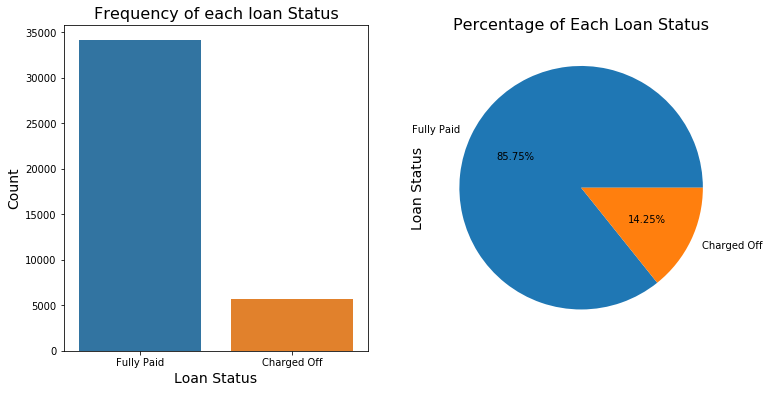

In [0]:
fig, axs = plt.subplots(1, 2, figsize = (12, 6))
sns.countplot(x = "loan_status", data = loans, ax = axs[0])
axs[0].set_title("Frequency of each loan Status", size = 16)
axs[0].set_xlabel("Loan Status", size = 14)
axs[0].set_ylabel("Count", size = 14)

loans["loan_status"].value_counts().plot(x = None, y = None, kind = "pie", ax = axs[1], autopct = "%1.2f%%") # "bar"
axs[1].set_title("Percentage of Each Loan Status", size = 16)
#axs[1].set_xlabel("Loan", color = "white")
axs[1].set_ylabel("Loan Status", size = 14)
plt.show()

The responsive feature **loan_status** is composed of two classes: Fully Paid (完全结清), & Charged Off (坏账注销). 

**Suggestion:**
The dataset is very imbalanced, and need further consideration later.

### 3.3.2 Visualization of the categorical features (分类变量的分布)

探索典型分类变量依据好坏样本两类的分布并进行可视化展示：

In [0]:
# list of the categorical/class features
categorical_features = ["term", "grade", "sub_grade", "emp_length", "home_ownership", "verification_status", "purpose", "emp_title", "title", "addr_state"]

### 1. term
Data Dictionary: "The number of payments on the laon. Values are in months and can be either 36 or 60."

**data processing**: convert "term" to integers

In [0]:
loans['term'] = loans['term'].replace(" 36 months", 36).replace(" 60 months", 60).astype('int')

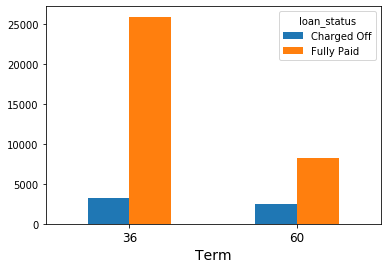

In [0]:
pvt = pd.pivot_table(loans[["loan_status", "term"]], index = "term", columns = "loan_status", aggfunc = len)

pvt.plot(kind = "bar", figsize = (6, 4))
plt.xlabel("Term", size = 14)
plt.xticks(rotation = 0, size = 12)
plt.show()


From the figure above, most people select the 36 months term. The percentage of 60 months loans are more likely to be charged off. 

### 2. grade, sub_grade
Data Dictionary for grade: "LendingClub assigned loan grade."

Data Dictionary for sub_grade: "LendingClub assigned loan subgrade."

However, the grade is implied by the subgrade, so **consider drop one**. 

In [0]:
print(sorted(loans["grade"].unique()))
print(sorted(loans["sub_grade"].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']
['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


<function matplotlib.pyplot.show>

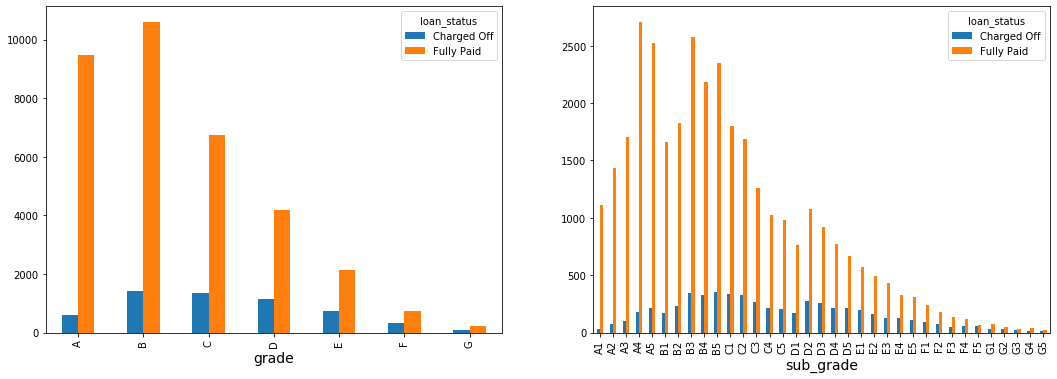

In [0]:
fig, axs = plt.subplots(1, 2)

pvt_1 = pd.pivot_table(loans[["loan_status", "grade"]], index = "grade", columns = "loan_status", aggfunc = len)
pvt_2 = pd.pivot_table(loans[["loan_status", "sub_grade"]], index = "sub_grade", columns = "loan_status", aggfunc = len)

pvt_1.plot(kind = "bar", figsize = (18, 6), ax = axs[0])
axs[0].set_xlabel("grade", size = 14)

pvt_2.plot(kind = "bar", figsize = (18, 6), ax = axs[1])
axs[1].set_xlabel("sub_grade", size = 14)
plt.show

From the results above, the distribution of the grade is very similar to that of sub_grade, but with more clusters. 

I will consider drop **sub_grade**, since the grade includes is managable. 

In [0]:
loans.drop(["sub_grade"], axis = 1, inplace = True)

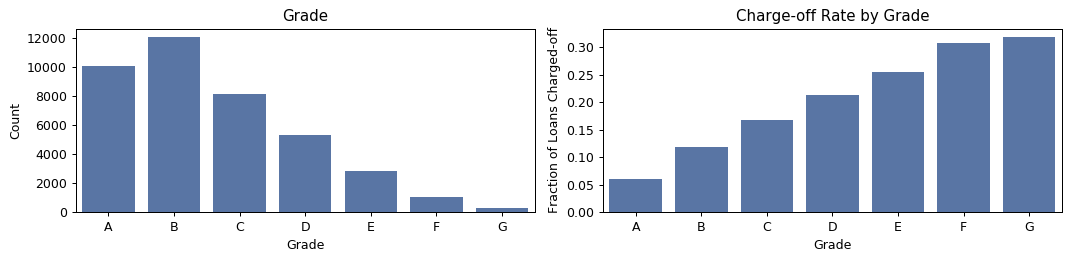

In [0]:
plot_var("grade", "Grade", continuous = False)

From the results above, it is clear that the lower grade, the higher probability of charge-off.

After more considertation, since the sample size for Grade D, E, F, and G are very small, and the charge-off rate for these groups are gradually increasing. I will conbine the group D, E, F, G

In [0]:
loans.grade.replace({"A": 0, "B": 1, "C": 2, "D": 3, "E": 3, "F": 3, "G": 3}, inplace = True)
#loans.grade.replace({0: 0, 1: 1, 2: 2, 3: 3, 4: 3, 5: 3, 6: 3}, inplace = True)

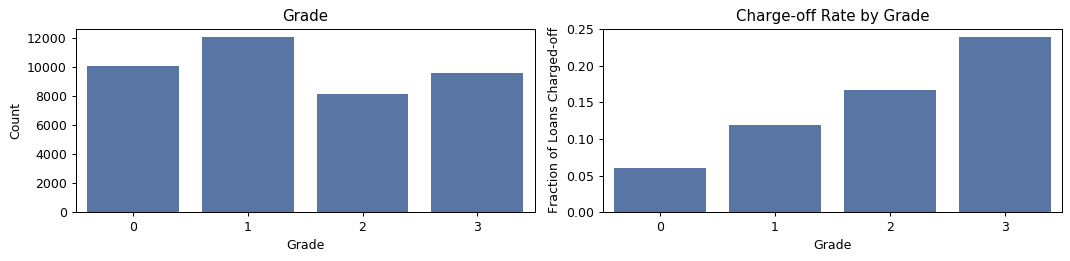

In [0]:
plot_var("grade", "Grade", continuous = False)

### 3. emp_length

Data Dictionary: "Employment length in years" 

**data processing**: convert "emp_length" to integers

In [0]:
loans['emp_length'].value_counts(dropna=False).sort_index()

1 year       3247
10+ years    8899
2 years      4394
3 years      4098
4 years      3444
5 years      3286
6 years      2231
7 years      1775
8 years      1485
9 years      1259
< 1 year     4590
NaN          1078
Name: emp_length, dtype: int64

There are 1078 missing values (2.7%), consider fill the missing values with mode.

In [0]:
#loans["emp_length"][loans["emp_length"].isnull()] = mode(loans["emp_length"][loans["emp_length"].notnull()])[0][0]

In [0]:
# feature emp_length
  loans.emp_length.replace({"< 1 year": 0, "1 year": 1, "2 years": 2, "3 years": 3, "4 years": 4, "5 years": 5, "6 years": 6, "7 years": 7, "8 years": 8,
                           "9 years": 9, "10+ years": 10, np.nan: 11}, inplace = True)

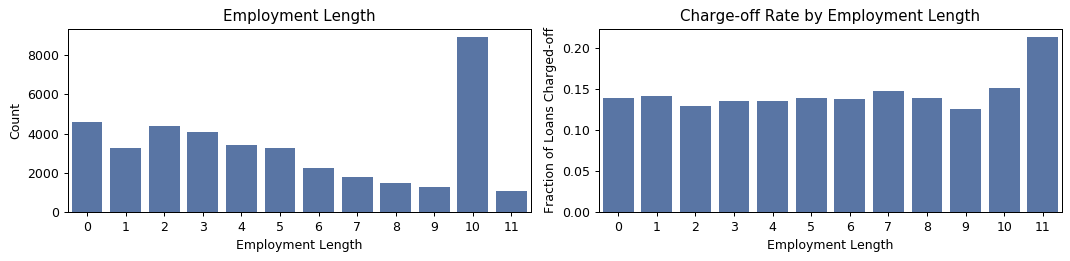

In [0]:
plot_var('emp_length', 'Employment Length', continuous=False)

A high percentage of users are 10 or more years in employment length. 
Loan status does not appear to vary much with employment length on average. However the probability of charge-off rate is much higher if the employment lenght is missing (label = 11), this could be the fact that the users don't have employment, or are unwilling to tell. 

#### After further considertation, the sample size for np.nana is quite small, and the charge-off rate is very high. I consider to replace it with 10 instead of 11. 

- Firstly, 10 is the mode, which is significantly higher than all other groups. 
- Secondly, the charge-off rate of the missing values is more consistant with group 10. 
- Thirdly, the length feature is an ordinal features, in this way, I can still keep the order of the values.



In [0]:
loans.emp_length.replace({0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8,
                           9: 9, 10: 10, 11: 10}, inplace = True)

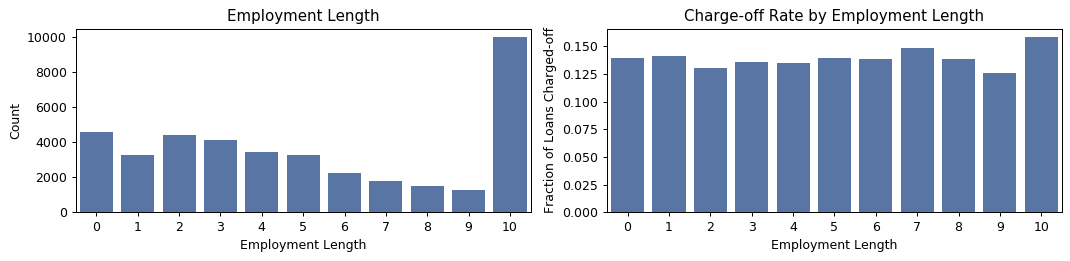

In [0]:
plot_var('emp_length', 'Employment Length', continuous=False)

### 4. home_ownership

replace the values NONE with OTHER


In [0]:
loans["home_ownership"].value_counts(dropna=False)

RENT        18918
MORTGAGE    17703
OWN          3064
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [0]:
loans['home_ownership'].replace(['NONE'], 'OTHER', inplace=True)

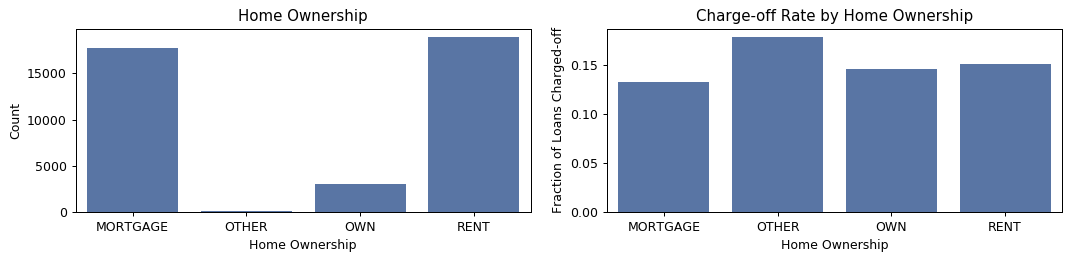

In [0]:
plot_var('home_ownership', 'Home Ownership', continuous=False)

Most of the home_ownership are mortgage and rent. Loan status does not appear to vary much with home_ownership on average. While the probability of charge-off rate for **OTHER** is a bit higher.

### 5. verification_status

Data Dictionary: "if income was verified by [Lending Club], not verified, or if the income source was verified"

In [0]:
loans["verification_status"].value_counts(dropna=False)

Not Verified       16926
Verified           12844
Source Verified    10016
Name: verification_status, dtype: int64

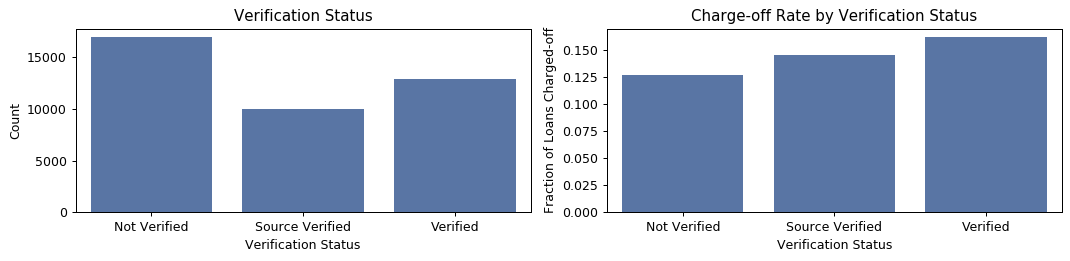

In [0]:
plot_var('verification_status', 'Verification Status', continuous=False)

It is interesting, the income for most of the users are not verified, while the charge-off rate is lowerst. 

### 6. purpose
Data Dictionary: "A category provided by the borrower for the loan request."
This feature is vey similar to that of title later.

In [0]:
loans["purpose"].value_counts(dropna = False)

debt_consolidation    18676
credit_card            5137
other                  4001
home_improvement       2985
major_purchase         2188
small_business         1831
car                    1551
wedding                 948
medical                 695
moving                  583
house                   382
vacation                381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

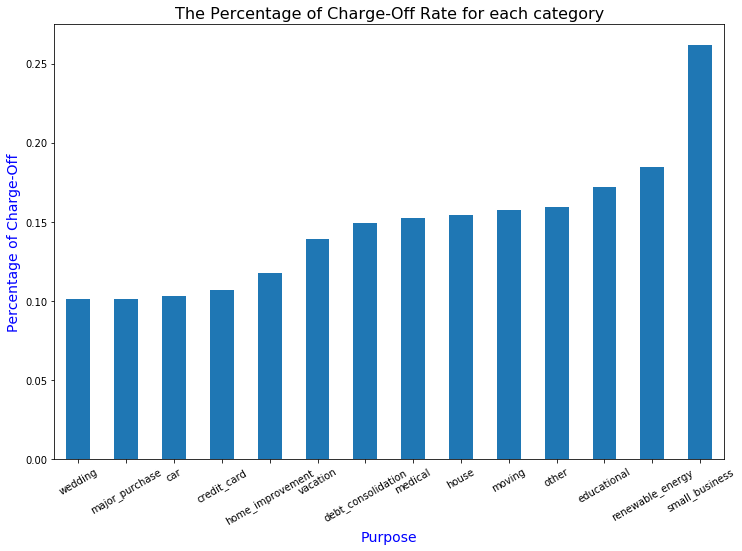

In [0]:
loans.groupby('purpose')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values().plot(kind = "bar", figsize = (12, 8)) # color = "green"
plt.title("The Percentage of Charge-Off Rate for each category", size = 16)
plt.xticks(rotation = 30)
plt.xlabel("Purpose", size = 14, color = "blue")
plt.ylabel("Percentage of Charge-Off", size = 14, color = "blue")
plt.show()

The charge-off rate for wedding is lowest, while for small_business is much higher than all others. 

### 7. emp_title
Data Dictionary: "The loan title provided by the borrower."

Since there are about 2800 different titles. After the visualization, I **consider drop** first. 

After the evaluation of the model, if the performance is not good enough, I may go back to do more feature engineering on this feature.

In [0]:
loans["emp_title"].value_counts()[:20]

US Army                    134
Bank of America            109
IBM                         66
AT&T                        60
Kaiser Permanente           57
USAF                        55
Wells Fargo                 54
UPS                         53
US Air Force                52
Walmart                     45
Lockheed Martin             44
State of California         42
United States Air Force     42
U.S. Army                   41
Verizon Wireless            40
Self Employed               40
USPS                        39
US ARMY                     39
Walgreens                   38
JP Morgan Chase             37
Name: emp_title, dtype: int64

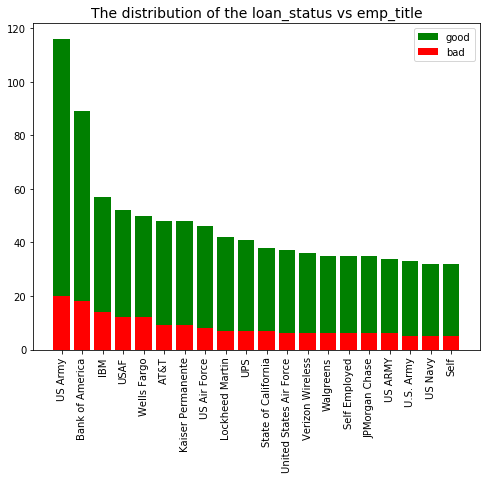

In [0]:
# text features distribution
# emp_title
y_0 = loans[loans.loan_status == 'Fully Paid'].emp_title.value_counts()[:20].values
y_1 = loans[loans.loan_status == 'Charged Off'].emp_title.value_counts()[:20].values
ind = loans[loans.loan_status == 'Fully Paid'].emp_title.value_counts()[:20].index
plt.figure(figsize = (8, 6))
plt.bar(ind, y_0, color = 'g')
plt.bar(ind, y_1, color = 'r')
plt.title("The distribution of the loan_status vs emp_title", size = 14, color = 'black')
# set xticks vertical
plt.xticks(ind, rotation = 'vertical') # 
plt.legend(['good', 'bad'])
plt.show()

In [0]:
# drop feature emp_title
loans.drop("emp_title", axis = 1, inplace = True)

### 8. title

Similar to the emp_title, the title also has about 2000 different classes. I consider ** drop it**. 

In addition to the large number of class, this feature is also implied in the feature purpose. 

In [0]:
loans["title"].value_counts(dropna = False)[:10]

Debt Consolidation           2191
Debt Consolidation Loan      1733
Personal Loan                 661
Consolidation                 517
debt consolidation            508
Credit Card Consolidation     357
Home Improvement              357
Debt consolidation            334
Small Business Loan           329
Credit Card Loan              319
Name: title, dtype: int64

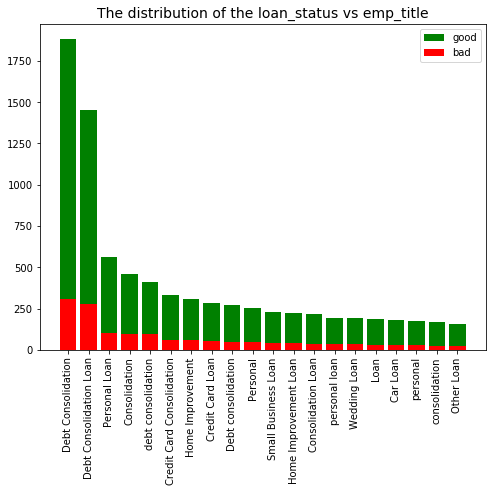

In [0]:
# text features distribution
# emp_title
y_0 = loans[loans.loan_status == 'Fully Paid'].title.value_counts()[:20].values
y_1 = loans[loans.loan_status == 'Charged Off'].title.value_counts()[:20].values
ind = loans[loans.loan_status == 'Fully Paid'].title.value_counts()[:20].index
plt.figure(figsize = (8, 6))
plt.bar(ind, y_0, color = 'g')
plt.bar(ind, y_1, color = 'r')
plt.title("The distribution of the loan_status vs emp_title", size = 14, color = 'black')
# set xticks vertical
plt.xticks(ind, rotation = "vertical") # 
plt.legend(['good', 'bad'])
plt.show()

In [0]:
loans.drop("title", axis = 1, inplace = True)

### 9. addr_state

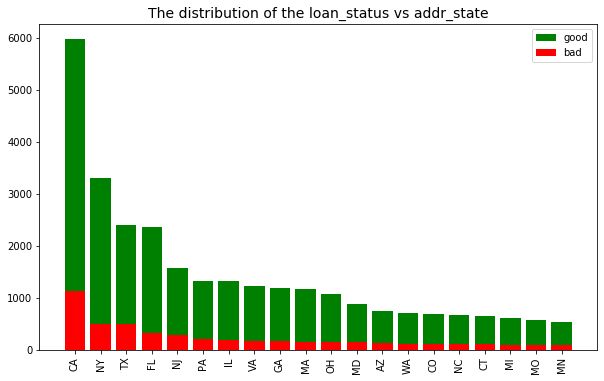

In [0]:
# text features distribution
# addr_state
y_0 = loans[loans.loan_status == 'Fully Paid'].addr_state.value_counts()[:20].values
y_1 = loans[loans.loan_status == 'Charged Off'].addr_state.value_counts()[:20].values
ind = loans[loans.loan_status == 'Fully Paid'].addr_state.value_counts()[:20].index
plt.figure(figsize = (10, 6))
plt.bar(ind, y_0, color = 'g')
plt.bar(ind, y_1, color = 'r')
plt.title("The distribution of the loan_status vs addr_state", size = 14, color = 'black')
# set xticks vertical
plt.xticks(ind, rotation = 'vertical') # 
plt.legend(['good', 'bad'])
plt.show()

In [0]:
#loans["addr_state"].value_counts()

# drop add_state first
loans.drop("addr_state", axis = 1, inplace = True)

### 3.3.3 Visualization of the numerical features (连续值特征分布)

### 1. loan_amnt: 
Data Dictionary: "The listed amount of the loan applied for by the borrower."

If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [0]:
loans.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5670.0,12147.491182,8108.982549,900.0,5612.5,10000.0,16750.0,35000.0
Fully Paid,34116.0,11079.101448,7341.022332,500.0,5500.0,9837.5,15000.0,35000.0


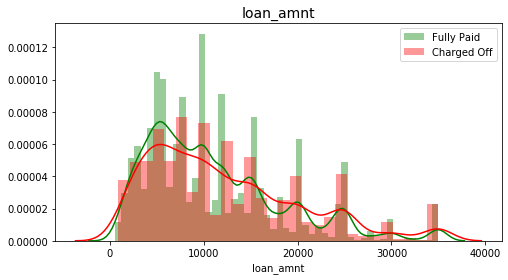

In [0]:
plt.figure(figsize = (8, 4))
df_temp_0 = loans["loan_amnt"][loans.loan_status == 'Fully Paid']
df_temp_1 = loans["loan_amnt"][loans.loan_status == 'Charged Off']
sns.distplot(df_temp_0.dropna(), color = 'g')
sns.distplot(df_temp_1.dropna(), color = 'r')
plt.title("loan_amnt", size = 14)
plt.legend(['Fully Paid', 'Charged Off'])
plt.show()

The charged-off tend to have higher loan_amnt.

### 2. installment
Data Dictionary: "The monthly payment owed by the borrower if the loan originates."



In [0]:
loans.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5670.0,336.810628,217.209322,22.79,168.74,294.76,458.8975,1305.19
Fully Paid,34116.0,322.726470,207.449182,15.69,166.50,278.63,426.1000,1295.21


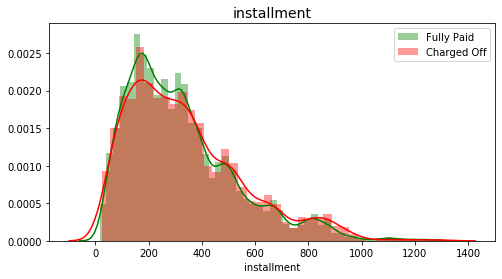

In [0]:
plt.figure(figsize = (8, 4))
df_temp_0 = loans["installment"][loans.loan_status == 'Fully Paid']
df_temp_1 = loans["installment"][loans.loan_status == 'Charged Off']
sns.distplot(df_temp_0.dropna(), color = 'g')
sns.distplot(df_temp_1.dropna(), color = 'r')
plt.title("installment", size = 14)
plt.legend(['Fully Paid', 'Charged Off'])
plt.show()

Charged-off loans tend to have $14 higher installments on average.

### 3. annual_inc

Data Dictionary: "The self-reported annual income provided by the borrower during registration."

In [0]:
loans.groupby('loan_status')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5670.0,62540.233340,47714.22363,4080.0,37200.00,53000.0,75000.0,1250000.0
Fully Paid,34116.0,70049.185921,65992.76733,4000.0,41866.75,60000.0,84000.0,6000000.0


Charged-off loans tend to have $7500 less annual income on average.

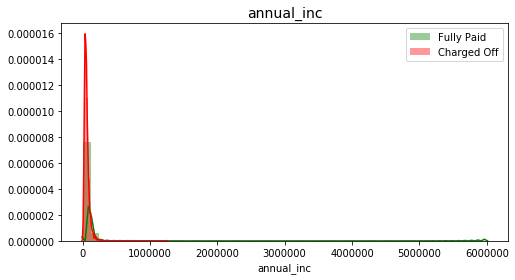

In [0]:
plt.figure(figsize = (8, 4))
df_temp_0 = loans["annual_inc"][loans.loan_status == 'Fully Paid']
df_temp_1 = loans["annual_inc"][loans.loan_status == 'Charged Off']
sns.distplot(df_temp_0.dropna(), color = 'g')
sns.distplot(df_temp_1.dropna(), color = 'r')
plt.title("annual_inc", size = 14)
plt.legend(['Fully Paid', 'Charged Off'])
plt.show()

The distribution of the annual_inc is very skewed, ranging from \$0 to \$6,000,000, Because of the large range of incomes, I will take a log transform of the annual income variable.

In [0]:
# transform the annual_inc to log_annual_inc, and drop the original features.
loans['log_annual_inc'] = loans['annual_inc'].apply(lambda x: np.log10(x+1))
loans.drop('annual_inc', axis=1, inplace=True)

In [0]:
loans.groupby('loan_status')['log_annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5670.0,4.724204,0.243144,3.610767,4.570555,4.724284,4.875067,6.096910
Fully Paid,34116.0,4.772476,0.241918,3.602169,4.621880,4.778158,4.924284,6.778151


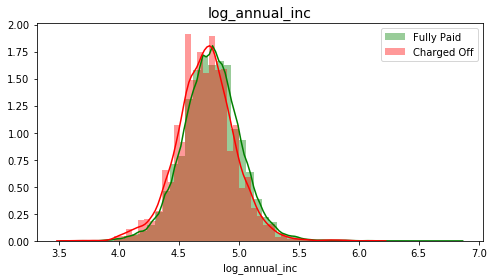

In [0]:
plt.figure(figsize = (8, 4))
df_temp_0 = loans["log_annual_inc"][loans.loan_status == 'Fully Paid']
df_temp_1 = loans["log_annual_inc"][loans.loan_status == 'Charged Off']
sns.distplot(df_temp_0.dropna(), color = 'g')
sns.distplot(df_temp_1.dropna(), color = 'r')
plt.title("log_annual_inc", size = 14)
plt.legend(['Fully Paid', 'Charged Off'])
plt.show()

The charged off tends to have less annual income.

### 4. dti
Data Dictionary: "A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."

In [0]:
loans.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5670.0,14.005540,6.580177,0.0,9.0525,14.295,19.29,29.85
Fully Paid,34116.0,13.203492,6.687713,0.0,8.0400,13.250,18.46,29.99


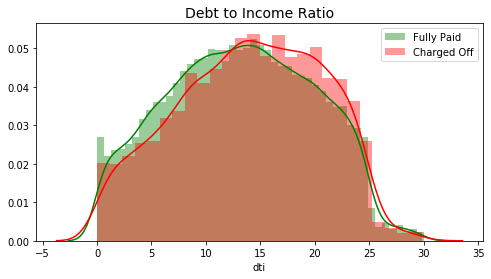

In [0]:
plt.figure(figsize = (8, 4))
df_temp_0 = loans["dti"][loans.loan_status == 'Fully Paid']
df_temp_1 = loans["dti"][loans.loan_status == 'Charged Off']
sns.distplot(df_temp_0.dropna(), color = 'g')
sns.distplot(df_temp_1.dropna(), color = 'r')
plt.title("Debt to Income Ratio", size = 14)
plt.legend(['Fully Paid', 'Charged Off'])
plt.show()

It seems that the charged off have higher debt to income ratio.

### 5. delinq_2yrs

Data Dictionary: "The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years"

It seems that this feature is important to the responsive feature. However, most of the values are 0 (88.79%), and the variance is 0.26. 

I will try to keep this feature first, but with some modification:

**Class 1**: all values > 0 or np.nan as 1, 1 or more delinquency

**class 0**: values = 0, no delinquency

In [0]:
loans["delinq_2yrs"].value_counts(dropna = False)

0.0     35466
1.0      3309
2.0       688
3.0       221
4.0        62
5.0        22
6.0        10
7.0         4
8.0         2
11.0        1
9.0         1
Name: delinq_2yrs, dtype: int64

In [0]:
loans['delinq_2yrs'] = np.where(loans['delinq_2yrs'] == 0, 0, 1)

In [0]:
# after transformation
loans["delinq_2yrs"].value_counts(dropna = False)

0    35466
1     4320
Name: delinq_2yrs, dtype: int64

### 6. inq_last_6mths
Data Dictionary: "The number of inquiries in past 6 months (excluding auto and mortgage inquiries)"

The counts for the values >= 6 are very low, less than 1000 in total. I will combine all the values >= 6 as 6

And replace the missing values with, 0

In [0]:
loans["inq_last_6mths"].value_counts(dropna = False)

0.0    19337
1.0    10986
2.0     5824
3.0     3053
4.0      326
5.0      146
6.0       64
7.0       35
8.0       15
Name: inq_last_6mths, dtype: int64

In [0]:
loans["inq_last_6mths"] = loans["inq_last_6mths"].fillna(0)
loans["inq_last_6mths"].mask(loans["inq_last_6mths"] > 6, 6, inplace=True)

In [0]:
# after transformation
loans["inq_last_6mths"].value_counts(dropna = False)

0.0    19337
1.0    10986
2.0     5824
3.0     3053
4.0      326
5.0      146
6.0      114
Name: inq_last_6mths, dtype: int64

### 7. mths_since_last_delinq
Data Dictionary: "The number of months since the borrower's last delinquency."

In [0]:
loans["mths_since_last_delinq"].value_counts(dropna = False)[:10]

NaN     25727
0.0       443
15.0      253
23.0      247
30.0      247
24.0      241
19.0      238
38.0      237
20.0      233
18.0      232
22.0      231
31.0      230
35.0      227
32.0      227
39.0      225
25.0      223
45.0      222
26.0      218
37.0      217
21.0      216
16.0      215
17.0      214
27.0      212
42.0      210
10.0      210
Name: mths_since_last_delinq, dtype: int64

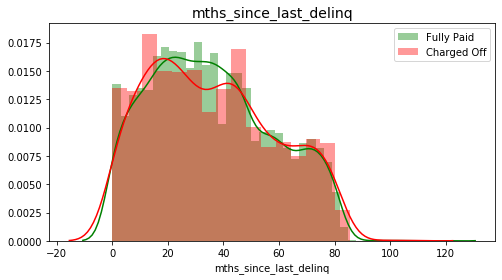

In [0]:
plt.figure(figsize = (8, 4))
df_temp_0 = loans["mths_since_last_delinq"][loans.loan_status == 'Fully Paid']
df_temp_1 = loans["mths_since_last_delinq"][loans.loan_status == 'Charged Off']
sns.distplot(df_temp_0.dropna(), color = 'g')
sns.distplot(df_temp_1.dropna(), color = 'r')
plt.title("mths_since_last_delinq", size = 14)
plt.legend(['Fully Paid', 'Charged Off'])
plt.show()

In [0]:
loans.groupby("loan_status")["mths_since_last_delinq"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,2157.0,36.142791,22.656178,0.0,17.0,34.0,53.0,107.0
Fully Paid,11902.0,35.858259,21.900919,0.0,18.0,34.0,52.0,120.0


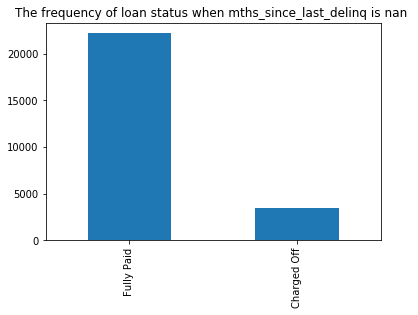

In [0]:
mths_null = loans.loc[loans["mths_since_last_delinq"].isnull()]
mths_null["loan_status"].value_counts().plot(kind = "bar")
plt.title("The frequency of loan status when mths_since_last_delinq is nan ")
plt.show()

From the result above, I will class this np.nan as one class, and all other as another class.

The reasons:

- the most of the nan are fully paid
- the description of this feature is very similar.

In [0]:
loans['mths_since_last_delinq'] = loans['mths_since_last_delinq'].fillna("Yes")

loans['mths_since_last_delinq'] = np.where(loans['mths_since_last_delinq'] == "Yes", 0, 1)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


### 8. mths_since_last_record

Data Dictionary: The number of months since the last public record.

The precentage of the missing value is about 93. I will **consider drop** it


In [0]:
loans["mths_since_last_record"].isnull().sum()/loans.shape[0]

0.9298496958729201

In [0]:
loans.drop("mths_since_last_record", axis = 1, inplace = True)

### 9. open_acc

Data Dictionary: Number of derogatory public records

I will combine all value >= 25 as 25

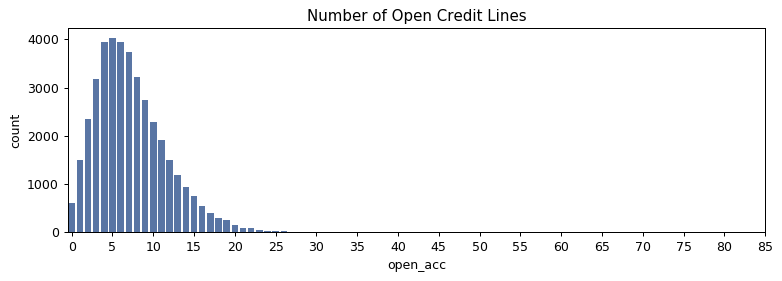

In [0]:
plt.figure(figsize=(10,3), dpi=90)
sns.countplot(loans['open_acc'], order=sorted(loans['open_acc'].unique()), color='#5975A4', saturation=1)
_, _ = plt.xticks(np.arange(0, 90, 5), np.arange(0, 90, 5))
plt.title('Number of Open Credit Lines')
plt.show()

In [0]:
loans["open_acc"].value_counts(dropna= False).sort_index()

2.0      608
3.0     1496
4.0     2346
5.0     3185
6.0     3954
7.0     4025
8.0     3944
9.0     3727
10.0    3227
11.0    2750
12.0    2279
13.0    1915
14.0    1489
15.0    1177
16.0     941
17.0     743
18.0     534
19.0     396
20.0     290
21.0     244
22.0     143
23.0      98
24.0      81
25.0      55
26.0      34
27.0      22
28.0      25
29.0      13
30.0      15
31.0       7
32.0       4
33.0       3
34.0       5
35.0       4
36.0       2
38.0       1
39.0       1
41.0       1
42.0       1
44.0       1
Name: open_acc, dtype: int64

In [0]:
loans["open_acc"].mask(loans["open_acc"] >= 25, 25, inplace=True)

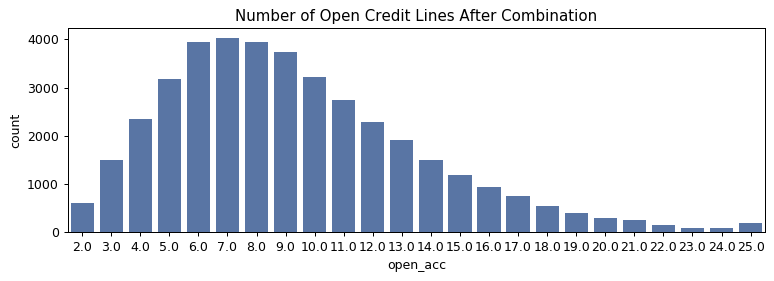

In [0]:
# after combination 
plt.figure(figsize=(10,3), dpi=90)
sns.countplot(loans['open_acc'], order=sorted(loans['open_acc'].unique()), color='#5975A4', saturation=1)
plt.title('Number of Open Credit Lines After Combination')
plt.show()

### 10. pub_rec

Data Dictionary: "Number of derogatory public records."

About 94.66% of the values of pub_rec are the same. The variance is 0.05. **consider drop**


In [0]:
loans["pub_rec"].value_counts(dropna= False).sort_index()

0.0    37665
1.0     2060
2.0       51
3.0        8
4.0        2
Name: pub_rec, dtype: int64

In [0]:
loans.drop("pub_rec", axis = 1, inplace = True)

### 11. revol_bal
Data Dictionary: "Total credit revolving balance."

The distribution for loan_status, and the range is huge, I will do the log transformation to this feature. 

In [0]:
loans.groupby('loan_status')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5670.0,13554.422399,15216.920186,0.0,3985.5,9262.0,17563.75,148829.0
Fully Paid,34116.0,13364.987015,16004.544358,0.0,3656.0,8808.0,16980.25,149588.0


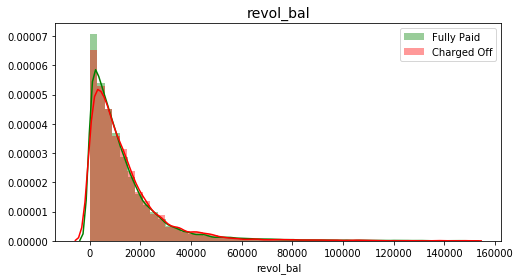

In [0]:
plt.figure(figsize = (8, 4))
df_temp_0 = loans["revol_bal"][loans.loan_status == 'Fully Paid']
df_temp_1 = loans["revol_bal"][loans.loan_status == 'Charged Off']
sns.distplot(df_temp_0.dropna(), color = 'g')
sns.distplot(df_temp_1.dropna(), color = 'r')
plt.title("revol_bal", size = 14)
plt.legend(['Fully Paid', 'Charged Off'])
plt.show()

In [0]:
loans['log_revol_bal'] = loans['revol_bal'].apply(lambda x: np.log10(x+1))
loans.drop('revol_bal', axis=1, inplace=True)

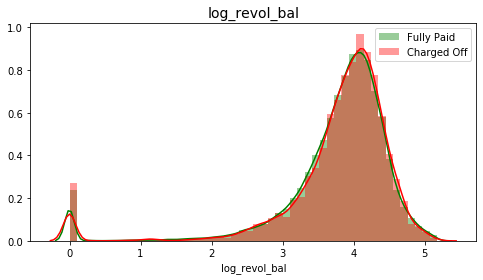

In [0]:
# after log transformation
plt.figure(figsize = (8, 4))
df_temp_0 = loans["log_revol_bal"][loans.loan_status == 'Fully Paid']
df_temp_1 = loans["log_revol_bal"][loans.loan_status == 'Charged Off']
sns.distplot(df_temp_0.dropna(), color = 'g')
sns.distplot(df_temp_1.dropna(), color = 'r')
plt.title("log_revol_bal", size = 14)
plt.legend(['Fully Paid', 'Charged Off'])
plt.show()

It looks ok. There isn't a large difference in the means.

### 12. total_acc

Data Dictionary: "The total number of credit lines currently in the borrower's credit file."

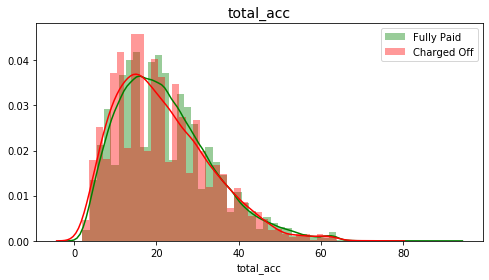

In [0]:
plt.figure(figsize = (8, 4))
df_temp_0 = loans["total_acc"][loans.loan_status == 'Fully Paid']
df_temp_1 = loans["total_acc"][loans.loan_status == 'Charged Off']
sns.distplot(df_temp_0.dropna(), color = 'g')
sns.distplot(df_temp_1.dropna(), color = 'r')
plt.title("total_acc", size = 14)
plt.legend(['Fully Paid', 'Charged Off'])
plt.show()

In [0]:
loans.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5670.0,21.457143,11.448791,2.0,13.0,20.0,28.0,74.0
Fully Paid,34116.0,22.195539,11.390520,2.0,14.0,21.0,29.0,90.0


It looks ok.

### 13. pub_rec_bankruptcies

Data Dictionary: "Number of public record bankruptcies."

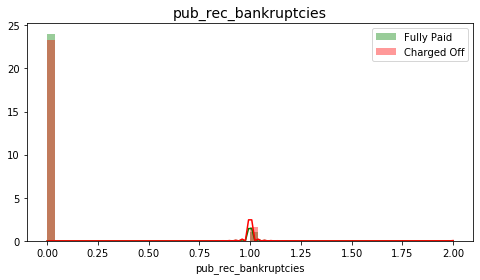

In [0]:
plt.figure(figsize = (8, 4))
df_temp_0 = loans["pub_rec_bankruptcies"][loans.loan_status == 'Fully Paid']
df_temp_1 = loans["pub_rec_bankruptcies"][loans.loan_status == 'Charged Off']
sns.distplot(df_temp_0.dropna(), color = 'g')
sns.distplot(df_temp_1.dropna(), color = 'r')
plt.title("pub_rec_bankruptcies", size = 14)
plt.legend(['Fully Paid', 'Charged Off'])
plt.show()

In [0]:
loans["pub_rec_bankruptcies"].value_counts(dropna = False)

0.0    37404
1.0     1678
NaN      697
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

Most of the values are zeros (94%). I **consider drop** this feature.

In [0]:
loans.drop("pub_rec_bankruptcies", axis = 1, inplace = True)

### 14. All feature after the approval of the loan, these features would lead to data leakage, thus must drop.

- "total_pymnt" 
- "total_pymnt_inv"
- "total_rec_prncp" 
- "total_rec_int"
- "recoveries"
- "last_pymnt_amnt" 
- "funded_amnt"
- "funded_amnt_inv"
- "total_rec_late_fee"
- "collection_recovery_fee"

In [0]:
# Leak featuers
leak_features = ["total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int",
                "recoveries","last_pymnt_amnt", "funded_amnt", "funded_amnt_inv", 
                "total_rec_late_fee", "collection_recovery_fee"]
loans.drop(leak_features, axis = 1, inplace = True)

### 3.3.4 Time Series Distribuiotn (时序特征分布)
全部时序特征：
- issue_d:（款发放月份），
- earliest_cr_line（首开信用卡时间），
- last_pymnt_d（最近一次收到还款的时间), 
- last_credit_pull_d（ＬＣ撤回信贷最近的月份

其中第１，３，４ 项都是贷后数据。


**consider drop** the 2 features to avoid data leakage: 

- last_pymnt_d
- last_credit_pull_d

### 1. Derived feature 1:  cre_hist = issue_d - earliest_cr_line 


将时序变量衍生为月份值，将（贷款发放时间－首次使用信用卡时间）作为一个新的变量，表示信用历史(cre_hist)，单位是月份。

In [0]:
# format time features
  loans['earliest_cr_line'] = [pd.datetime.strptime(str(j), '%b-%Y') for j in loans['earliest_cr_line']]
  loans['issue_d'] = [pd.datetime.strptime(str(j), '%b-%Y') for j in loans['issue_d']]

In [0]:
loans['cre_hist'] = [j.days for j in (loans.issue_d - loans.earliest_cr_line)/30]
loans.drop(['issue_d', 'earliest_cr_line', "last_pymnt_d", "last_credit_pull_d"], axis = 1, inplace = True)

### 3.3.5 Other features
format the numerical features, remove the % sign
- int_rate 
- revol_util

In [0]:
num_features_in_str =["int_rate", "revol_util"]
for feature in num_features_in_str:
  loans[feature] = loans[feature].str.replace("%", "").astype("float")

### 1. int_rate

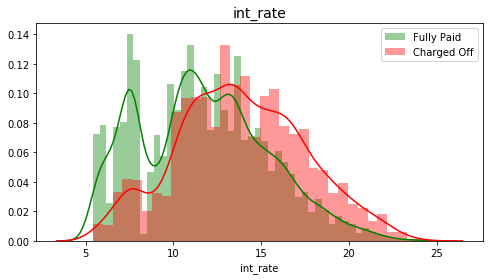

In [0]:
plt.figure(figsize = (8, 4))
df_temp_0 = loans["int_rate"][loans.loan_status == 'Fully Paid']
df_temp_1 = loans["int_rate"][loans.loan_status == 'Charged Off']
sns.distplot(df_temp_0.dropna(), color = 'g')
sns.distplot(df_temp_1.dropna(), color = 'r')
plt.title("int_rate", size = 14)
plt.legend(['Fully Paid', 'Charged Off'])
plt.show()

In [0]:
loans.groupby("loan_status")["int_rate"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5670.0,13.837469,3.655730,5.42,11.36,13.61,16.40,24.40
Fully Paid,34116.0,11.727123,3.653453,5.42,8.88,11.49,14.17,24.59


From the result, the charged off have a much more higher int_rate on average.

### 2. revol_util

Data Dictionary: "Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit."

There are 50 missing values for this feature. I will replace the missing values with mode. In general, since the size of missing values is not large, and the distribution of the feature is very flat. Replacing the missing values before and after the split of the training, validation, testing datasets should be close. 

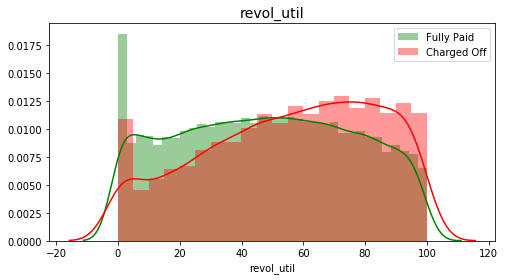

In [0]:
plt.figure(figsize = (8, 4))
df_temp_0 = loans["revol_util"][loans.loan_status == 'Fully Paid']
df_temp_1 = loans["revol_util"][loans.loan_status == 'Charged Off']
sns.distplot(df_temp_0.dropna(), color = 'g')
sns.distplot(df_temp_1.dropna(), color = 'r')
plt.title("revol_util", size = 14)
plt.legend(['Fully Paid', 'Charged Off'])
plt.show()

In [0]:
loans.groupby("loan_status")["revol_util"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5654.0,55.629432,27.886287,0.0,34.5,58.45,79.175,99.9
Fully Paid,34082.0,47.734804,28.254548,0.0,24.2,47.85,71.000,99.9


In [0]:
loans["revol_util"][loans["revol_util"].isnull()] = mode(loans["revol_util"][loans["revol_util"].notnull()])[0][0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


The charged off have a much higher revol_util values. This is understandable.

### 3.3.6 Finally

#### After the visualization, now I will convert loan status to 0/1

In [0]:
loans["loan_status"].value_counts()

Fully Paid     34116
Charged Off     5670
Name: loan_status, dtype: int64

In [0]:
loans['loan_status'] = np.where(loans['loan_status'] == "Fully Paid", 0, 1)

# 4. More data preprocessing and feature engineering (数据预处理 & 特征工程)

After the first and second round of data cleaning. The dataset becomes more understandable and managable.

In [0]:
loans.shape

(39786, 20)

In [0]:
loans.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
emp_length                0
home_ownership            0
verification_status       0
loan_status               0
purpose                   0
dti                       0
delinq_2yrs               0
inq_last_6mths            0
mths_since_last_delinq    0
open_acc                  0
revol_util                0
total_acc                 0
log_annual_inc            0
log_revol_bal             0
cre_hist                  0
dtype: int64

The dataset looks ok. No missing values.

## 4.1. training, validation, testing datasets split

### 1. About data leakage (警惕数据泄露)

Two things about data leakage

1. The inappropriate features after the determination of the **responsive feature** would lead to data leakage.

2. The inappropriate split of training, validation, testing datasets would also need to data leakage, e.g., fill the missing values with mean, the calculation of the features based on the whole dataset before the data split. 

I have been very careful about these aspects. During the previous steps, when I was filling the missing values or derivative features, I just fill in with constants, or I know even after the separatation of the datasets, the filled values would be the same. 


To avoid data leakage, it's better to split the datasets before data preprocessing. 

In [0]:
from sklearn.model_selection import train_test_split

# split the data
x_col = loans.columns.tolist()
x_col.remove('loan_status') # remove target variable from x
X = loans[x_col]
y = loans['loan_status']

# 64% training data, 16% validation data, 20% testing data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 1)

df_train = pd.concat([x_train, y_train], axis = 1)
df_val = pd.concat([x_val, y_val], axis = 1)
df_test = pd.concat([x_test, y_test], axis = 1)

df_list = [df_train, df_val, df_test]

print("The shape of training dataset: {}".format(df_train.shape))
print("The shape of validation dataset: {}".format(df_val.shape))
print("The shape of testing dataset: {}".format(df_test.shape))

The shape of training dataset: (25462, 21)
The shape of validation dataset: (6366, 21)
The shape of testing dataset: (7958, 21)


### 3.2.6 The correlation of each two numerical features (两两特征的协方差)

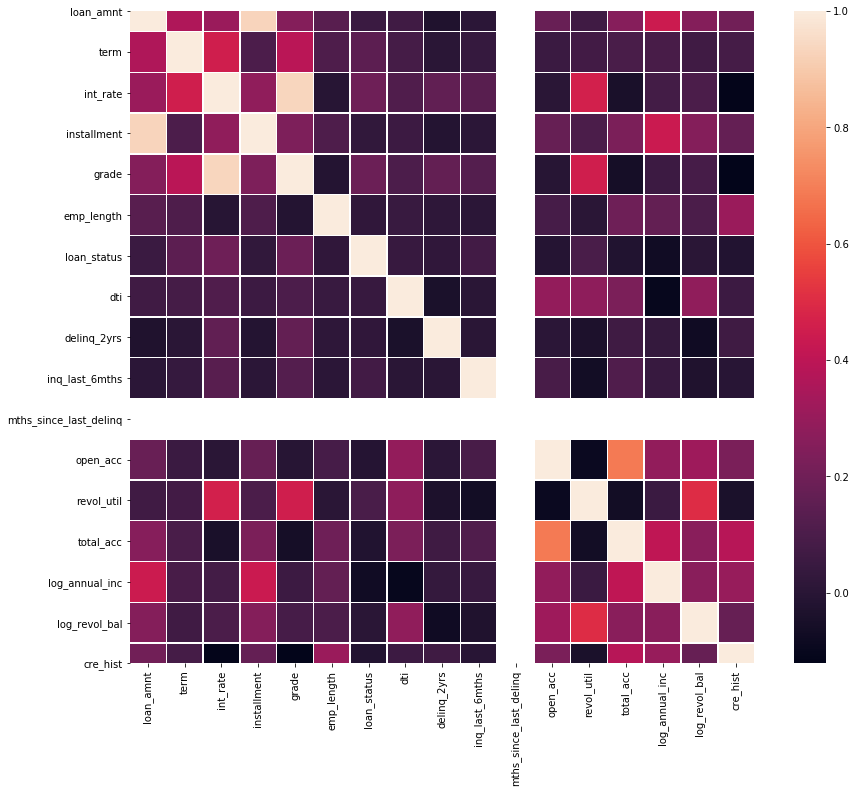

In [0]:
# feature's correlation
plt.figure(figsize = (14, 12))
sns.heatmap(loans.iloc[:, :50].corr(), linewidths=.5 ) # annot = True
plt.show()

上图中浅颜色的部分是表示特征相关度高，除了对角线的区域，其它区域也分布着高相关性特征对，这说明样本集中某些特征之间存在强线性相关性，这个问题在选用某些机器学习模型（比如基于线性回归的模型族）时会显著影响模型性能，需要引起注意。

## 4.2 features encoding (特征编码)

- categorical features
- nominal features: one-hot-encoding

In [0]:
print(loans.shape)
loans.head()

(39786, 21)


,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,revol_util,total_acc,log_annual_inc,log_revol_bal,cre_hist
0,5000.0,36,10.65,162.87,1,10,RENT,Verified,0,credit_card,AZ,27.65,0,1.0,1,3.0,83.7,9.0,4.380229,4.135101,327
1,2500.0,60,15.27,59.83,2,0,RENT,Source Verified,1,car,GA,1.00,0,5.0,1,3.0,9.4,4.0,4.477136,3.227372,154
2,2400.0,36,15.96,84.33,2,10,RENT,Not Verified,0,small_business,IL,8.72,0,2.0,1,2.0,98.5,10.0,4.088242,3.470851,122
3,10000.0,36,13.49,339.31,2,10,RENT,Source Verified,0,other,CA,20.00,0,1.0,1,10.0,21.0,37.0,4.691974,3.748110,192
4,3000.0,60,12.69,67.79,1,1,RENT,Source Verified,0,other,OR,17.94,0,0.0,1,15.0,53.9,38.0,4.903095,4.443795,193


In [0]:
# the features 
other_features = ["delinq_2yrs", "mths_since_last_delinq"]
#loans["pub_rec"].value_counts()

In [0]:
from sklearn.preprocessing import OneHotEncoder
# 7 nominal_features, need one-hot-encoding
nominal_features = ["term", "home_ownership", "verification_status", "purpose", 
                   # "addr_state", 
                    "mths_since_last_delinq",  "delinq_2yrs"]
updated_df_list = []
for data in df_list:

  data = pd.get_dummies(data, columns = nominal_features, drop_first = True)
  updated_df_list.append(data)

  

In [0]:
df_train.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,revol_util,total_acc,log_annual_inc,log_revol_bal,cre_hist,loan_status
15908,7000.0,36,5.99,212.93,0,6,MORTGAGE,Source Verified,other,TX,6.46,0,0.0,1,15.0,0.8,31.0,4.698979,2.271842,324,0
6796,14000.0,36,6.03,426.10,0,6,RENT,Not Verified,house,NJ,7.35,0,0.0,1,18.0,6.0,32.0,5.021193,3.716671,126,0
33525,10000.0,36,15.31,348.16,3,2,OWN,Not Verified,home_improvement,TX,6.59,0,2.0,1,7.0,60.9,14.0,4.908490,3.610979,133,0
49,11000.0,36,6.62,337.75,0,5,RENT,Not Verified,debt_consolidation,CT,10.85,0,0.0,1,5.0,36.4,7.0,4.845104,4.065916,120,0
17697,2000.0,36,11.11,65.59,1,0,OWN,Source Verified,moving,IL,16.56,0,2.0,1,7.0,93.1,9.0,4.362501,4.025838,183,0


In [0]:
df_train = updated_df_list[0]
df_val = updated_df_list[1]
df_test = updated_df_list[2]

print(df_train.shape)
print(df_val.shape)
print(df_test.shape)


(25462, 35)
(6366, 35)
(7958, 35)


## 4.3 Data normalization (归一化处理)

逻辑回归模型基于线性回归，求参需要用到梯度下降法，为了加快迭代速度，不同特征的变化范围规模相差不宜过大，如果用数值直接带入逻辑回归模型，必须进行变量缩放。但是本文是用随机森林， 所以这一步可以省略。

Since the normalization will not impact the one-hot-encoding features, and the features with 2 groups. 

I will use normalization

Actually, at the previous data preprocessing, I have transformed the very skewed features. 

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
# need standardization
continuous_features = ["loan_amnt", "int_rate", "installment", "grade", "emp_length", 
                       "dti", "inq_last_6mths", "open_acc", "revol_util", "total_acc", "log_annual_inc",
                       "log_revol_bal", "cre_hist"]

#from sklearn.preprocessing import StandardScaler
#df_list = []
col = continuous_features 
df_list = []
for data in updated_df_list:  
  scaler = StandardScaler()
  data[col] = scaler.fit_transform(data[col])
  df_list.append(data)

In [0]:
df_train = df_list[0]
df_val = df_list[1]
df_test = df_list[2]


print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(25462, 35)
(6366, 35)
(7958, 35)


In [0]:
df_train.describe()

,loan_amnt,int_rate,installment,grade,emp_length,dti,inq_last_6mths,open_acc,revol_util,total_acc,log_annual_inc,log_revol_bal,cre_hist,loan_status,term_60,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,delinq_2yrs_1
count,2.546200e+04,2.546200e+04,2.546200e+04,2.546200e+04,2.546200e+04,2.546200e+04,2.546200e+04,2.546200e+04,2.546200e+04,2.546200e+04,2.546200e+04,2.546200e+04,2.546200e+04,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000
mean,2.220926e-17,1.592735e-16,1.015800e-16,-7.151961e-16,-3.681674e-16,-6.399632e-17,1.063149e-15,-9.941515e-17,-1.427632e-16,1.560818e-16,4.526267e-16,3.142151e-16,-6.567940e-17,0.143429,0.269107,0.002788,0.076035,0.476750,0.253554,0.323345,0.128427,0.468227,0.008365,0.074700,0.010015,0.054316,0.016613,0.015081,0.100621,0.002906,0.047247,0.009426,0.023918,0.109850
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,0.350517,0.443504,0.052733,0.265059,0.499469,0.435054,0.467762,0.334571,0.498999,0.091081,0.262911,0.099574,0.226645,0.127819,0.121879,0.300832,0.053833,0.212171,0.096630,0.152797,0.312709
min,-1.437781e+00,-1.774774e+00,-1.477777e+00,-1.291738e+00,-1.405963e+00,-1.984226e+00,-8.166811e-01,-1.685333e+00,-1.721859e+00,-1.760738e+00,-4.768435e+00,-4.580169e+00,-1.580722e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.676720e-01,-7.480959e-01,-7.572257e-01,-1.291738e+00,-8.529515e-01,-7.723052e-01,-8.166811e-01,-7.601029e-01,-8.262029e-01,-7.744384e-01,-6.417310e-01,-2.500432e-01,-6.851294e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.645741e-01,-4.845404e-02,-2.146223e-01,-3.914003e-01,-2.999404e-01,1.275700e-02,1.295912e-01,-6.618003e-02,2.008602e-02,-1.826589e-01,1.938304e-02,2.060516e-01,-1.647175e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.055348e-01,6.833553e-01,5.115530e-01,5.089371e-01,1.359093e+00,7.933416e-01,1.295912e-01,6.277428e-01,8.275867e-01,6.063804e-01,6.202880e-01,5.517314e-01,4.767205e-01,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.185970e+00,3.363976e+00,4.680104e+00,1.409274e+00,1.359093e+00,2.485852e+00,4.860953e+00,3.634742e+00,1.800819e+00,5.954314e+00,7.531550e+00,1.695823e+00,7.617256e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 4.4 Features selection (筛选变量)

过滤方法（filter approach）: 通过自变量之间或自变量与目标变量之间的关联关系选择特征。

嵌入方法（embedded approach）: 通过学习器自身自动选择特征。


包装方法（wrapper approacch）: 通过目标函数（AUC/MSE）来决定是否加入一个变量。
对于三种特征选择的方法，scikit-learn官网也有相应的工程实现方法，具体详见Feature selection。本次项目，我采用Filter、Embedded和Wrapper三种方法组合进行特征选择。

In [0]:
df_train.describe() # 初览数据

,loan_amnt,int_rate,installment,grade,emp_length,dti,inq_last_6mths,open_acc,revol_util,total_acc,log_annual_inc,log_revol_bal,cre_hist,loan_status,term_60,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,delinq_2yrs_1
count,2.546200e+04,2.546200e+04,2.546200e+04,2.546200e+04,2.546200e+04,2.546200e+04,2.546200e+04,2.546200e+04,2.546200e+04,2.546200e+04,2.546200e+04,2.546200e+04,2.546200e+04,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000,25462.000000
mean,2.220926e-17,1.592735e-16,1.015800e-16,-7.151961e-16,-3.681674e-16,-6.399632e-17,1.063149e-15,-9.941515e-17,-1.427632e-16,1.560818e-16,4.526267e-16,3.142151e-16,-6.567940e-17,0.143429,0.269107,0.002788,0.076035,0.476750,0.253554,0.323345,0.128427,0.468227,0.008365,0.074700,0.010015,0.054316,0.016613,0.015081,0.100621,0.002906,0.047247,0.009426,0.023918,0.109850
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,0.350517,0.443504,0.052733,0.265059,0.499469,0.435054,0.467762,0.334571,0.498999,0.091081,0.262911,0.099574,0.226645,0.127819,0.121879,0.300832,0.053833,0.212171,0.096630,0.152797,0.312709
min,-1.437781e+00,-1.774774e+00,-1.477777e+00,-1.291738e+00,-1.405963e+00,-1.984226e+00,-8.166811e-01,-1.685333e+00,-1.721859e+00,-1.760738e+00,-4.768435e+00,-4.580169e+00,-1.580722e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.676720e-01,-7.480959e-01,-7.572257e-01,-1.291738e+00,-8.529515e-01,-7.723052e-01,-8.166811e-01,-7.601029e-01,-8.262029e-01,-7.744384e-01,-6.417310e-01,-2.500432e-01,-6.851294e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.645741e-01,-4.845404e-02,-2.146223e-01,-3.914003e-01,-2.999404e-01,1.275700e-02,1.295912e-01,-6.618003e-02,2.008602e-02,-1.826589e-01,1.938304e-02,2.060516e-01,-1.647175e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.055348e-01,6.833553e-01,5.115530e-01,5.089371e-01,1.359093e+00,7.933416e-01,1.295912e-01,6.277428e-01,8.275867e-01,6.063804e-01,6.202880e-01,5.517314e-01,4.767205e-01,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.185970e+00,3.363976e+00,4.680104e+00,1.409274e+00,1.359093e+00,2.485852e+00,4.860953e+00,3.634742e+00,1.800819e+00,5.954314e+00,7.531550e+00,1.695823e+00,7.617256e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
df_train.head()

,loan_amnt,int_rate,installment,grade,emp_length,addr_state,dti,inq_last_6mths,open_acc,revol_util,total_acc,log_annual_inc,log_revol_bal,cre_hist,loan_status,term_60,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,delinq_2yrs_1
15908,-0.566639,-1.621978,-0.535628,-1.291738,0.253071,TX,-1.020062,-0.816681,1.321666,-1.693649,0.781723,-0.277276,-1.824935,1.904828,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6796,0.371513,-1.611256,0.484631,-1.291738,0.253071,NJ,-0.887229,-0.816681,2.015588,-1.510286,0.869394,1.052536,-0.072681,-0.491488,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
33525,-0.164574,0.876360,0.111600,1.409274,-0.852952,TX,-1.000660,1.075864,-0.528795,0.425599,-0.708685,0.587400,-0.200861,-0.406770,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
49,-0.030552,-1.453099,0.061777,-1.291738,-0.023435,CT,-0.364849,-0.816681,-0.991410,-0.438320,-1.322382,0.325799,0.350874,-0.564103,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
17697,-1.236748,-0.249501,-1.240816,-0.391400,-1.405963,IL,0.487376,1.075864,-0.528795,1.561037,-1.147040,-1.665951,0.302269,0.198361,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


## 4.4.1 Method 1: vif + correlation (也可以correlation + p-value)


*   Hope a strong relationship between each feature and the responsive feature 
*   Hope a weak relationship between features (not responsive feature)


逻辑回归是基于线性回归模型，其前提假设是用于建模的特征之间不存在线性相关性，因此，它对共线性问题比较敏感。共线性的存在对模型稳定性有很大影响，并且也无法区分每个特征对目标变量的解释性。

依据VIF（方差膨胀系数）筛选变量

每个特征的VIF计算是用其它特征对它进行回归拟合，如果这种拟合的解释性很强，说明它们之间存在多重共线性。

用VIF计算连续型变量的共线性：

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif_feas = ['loan_amnt', 'int_rate', 'installment', 'grade', 'emp_length',
       'dti', 'inq_last_6mths', 'open_acc', 'revol_util',
       'total_acc', 'log_annual_inc', 'log_revol_bal', 'cre_hist',
       'loan_status', 'term_60', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Source Verified',
       'verification_status_Verified', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'delinq_2yrs_1']

# calcuate vif
for i in range(len(vif_feas)):
  vif_ls.append([vif_feas[i], vif(df_train[vif_feas].values, i)])

vif_df = pd.DataFrame(vif_ls, columns = ['col_name', 'vif'])
vif_df.sort_values(by = 'vif', ascending = False)

,col_name,vif
0,loan_amnt,17.648915
2,installment,16.182835
1,int_rate,9.461564
3,grade,8.059749
14,term_60,3.958661
21,purpose_debt_consolidation,2.924295
17,home_ownership_RENT,2.602651
8,revol_util,2.445123
9,total_acc,2.412213
7,open_acc,2.252420


In [0]:
# calculate correlation
cor = df_train[vif_feas].corr()

# get lower trianglar matrix of cor
cor.iloc[:, :] = np.tril(cor.values, k = -1)

# stack columns of cor
cor = cor.stack()
cor[np.abs(cor) > 0.7]

installment  loan_amnt    0.931552
grade        int_rate     0.934250
dtype: float64

Usually, vif > 10 and/or cor>0.7 indicates the strong correlation among features. 

From the VIF values and correlation above, there is a strong linear correlation between **installment** & **loan_amnt**, **int_rate** & **grade**. I will consider dropping the **loan_amnt**, and **grade**, and check the vif and correlation again. 

从上述关于协方差和VIF的分析结果中我们可以看到：installment & loan_amnt, int_rate & grade 之间存在很强线性关系，删除**grade**, **loan_amnt**,再去检测相关系数。

此外，还有处于边界地带的特征，暂时留下，特征工程中删除特征时要谨慎，因为删除特征，意味着弃用一些信息。

### Check the vif and correlation again after deleting the highly correlated features

In [0]:
# remove 'grade'
correlated_features = ["grade", "loan_amnt"]
vif_feas = [feature for feature in vif_feas if feature not in correlated_features]  

In [0]:
# calcuate vif

vif_ls = []
for i in range(len(vif_feas)):
  vif_ls.append([vif_feas[i], vif(df_train[vif_feas].values, i)])
  
vif_df = pd.DataFrame(vif_ls, columns = ['col_name', 'vif'])
vif_df.sort_values(by = 'vif', ascending = False)

,col_name,vif
19,purpose_debt_consolidation,2.741948
15,home_ownership_RENT,2.590833
6,revol_util,2.435589
7,total_acc,2.410387
0,int_rate,2.333021
5,open_acc,2.247857
17,verification_status_Verified,2.148744
12,term_60,2.011579
9,log_revol_bal,1.922551
8,log_annual_inc,1.691788


In [0]:
# calculate correlation
cor = df_train[vif_feas].corr()

# get lower trianglar matrix of cor
cor.iloc[:, :] = np.tril(cor.values, k = -1)

# stack columns of cor
cor = cor.stack()
cor[np.abs(cor) > 0.7]

Series([], dtype: float64)

### After removing the feature **grade**, **loan_amnt**, the vif of all features are now < 10, and no two features have correlations greater than 0.7


In [0]:
# temperially remove the feature add_state
for data in df_list:
  data.drop(["grade", "loan_amnt", "addr_state"], axis = 1, inplace = True)

## 4.2.2 Method 2: Features selections based on the features importance from Random Forest Classifier (依据随机森林特征重要性筛选变量)
很多时候我们需要了解每个特征对目标的影响程度，在特定的业务场景下，不同的特征权重对业务的决策带来不同的影响。例如，在Lending Club的业务数据中，能够反映借款人资产状况或现金流的特征都对我们构建预测违约贷款模型十分关键。因此，我们需要对特征的权重有一个正确的评判和排序，就可以通过特征重要性排序来挖掘哪些变量是比较重要的，降低学习难度，最终达到优化模型计算的目的。这里，我们采用的是随机森林算法判定特征的重要性，工程实现方式采用scikit-learn的featureimportances 的方法，具体操介绍详见官方文档Feature importances with forests of trees。


In [0]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
# Create random Forest classifier
rfc = RandomForestClassifier(n_estimators = 50)

# 建立递归特征消除筛选器
rfe = RFE(rfc, 20) #通过递归选择特征，选择30个特征
rfe = rfe.fit(df_train, y_train)

#print(rfe.support_)
#print(rfe.ranking_) #ranking 为 1代表被选中，其他则未被代表未被选中
print(df_train.columns[rfe.support_])

Index(['int_rate', 'installment', 'emp_length', 'dti', 'inq_last_6mths',
       'open_acc', 'revol_util', 'total_acc', 'log_annual_inc',
       'log_revol_bal', 'cre_hist', 'loan_status', 'term_60',
       'home_ownership_RENT', 'verification_status_Source Verified',
       'verification_status_Verified', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_small_business',
       'delinq_2yrs_1'],
      dtype='object')


In [0]:
x_train = df_train.drop(["loan_status"], axis = 1)
names = x_train.columns

rfc = RandomForestClassifier(n_estimators = 50, random_state=123)#构建分类随机森林分类器
rfc.fit(x_train , y_train) #对自变量和因变量进行拟合
#importance =  rfc.feature_importances_
for feature in zip(names, rfc.feature_importances_):
    print(feature)

('int_rate', 0.10134661143435533)
('installment', 0.09379017508617926)
('emp_length', 0.04736801573588898)
('dti', 0.09039204123373187)
('inq_last_6mths', 0.032982344292964996)
('open_acc', 0.060474216090672536)
('revol_util', 0.09484562286959522)
('total_acc', 0.07381704479556231)
('log_annual_inc', 0.09324703654673318)
('log_revol_bal', 0.09131064795783451)
('cre_hist', 0.08754566812495307)
('term_60', 0.017966764654798174)
('home_ownership_OTHER', 0.0011146482890581877)
('home_ownership_OWN', 0.006495389720930365)
('home_ownership_RENT', 0.013055685587625826)
('verification_status_Source Verified', 0.011588902887124474)
('verification_status_Verified', 0.012572461558727514)
('purpose_credit_card', 0.007110384065166291)
('purpose_debt_consolidation', 0.011419608937285117)
('purpose_educational', 0.0015847295891942895)
('purpose_home_improvement', 0.00544926516977167)
('purpose_house', 0.0025717831209919944)
('purpose_major_purchase', 0.0037669093701726193)
('purpose_medical', 0.00231

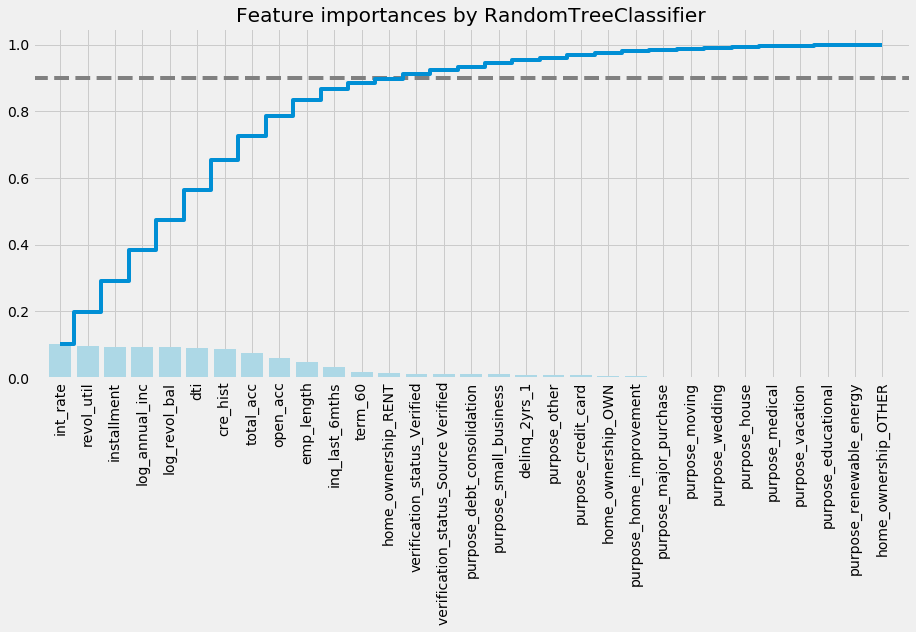

In [0]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10,6)

## feature importances 可视化##
importances = rfc.feature_importances_
feat_names = names
indices = np.argsort(importances)[::-1]
fig = plt.figure(figsize=(14,6))
plt.axhline(y = 0.9, linestyle = "--", color = "gray")
plt.title("Feature importances by RandomTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation= "vertical", fontsize=14) # 'vertical'
plt.xlim([-1, len(indices)])
plt.show()

## 4.2.3 Method 3: Selection features based on Variance

当特征是离散的时候好用，连续的时候效果不好。
例如连续的时候，越的outier， 方差越大



使用方差选择法，先要计算各个特征的方差，然后根据阈值，选择方差大于阈值的特征

正常情况下，影响目标变量的因数是多元性的；但不同因数之间会互相影响（共线性 ），或相重叠，进而影响到统计结果的真实性。下一步，我们在第一次降维的基础上，通过皮尔森相关性图谱找出冗余特征并将其剔除；同时，可以通过相关性图谱进一步引导我们选择特征的方向。

In [0]:
"""
from sklearn.feature_selection import VarianceThreshold
  
x = df_train.drop(["loan_status"], axis = 1)
target = "loan_status"
variancethreshold=VarianceThreshold(threshold=1)
for feature in x.columns:
  
  VarianceThreshold.fit_transform(df_train[feature, target])
  print(x[VarianceThreshold.get_support()])

#使用get_support方法，可以得到选择特征列的序号，
#然后根据这个序号在原始数据中把对应的列名选择出来即可

"""

'\nfrom sklearn.feature_selection import VarianceThreshold\n  \nx = df_train.drop(["loan_status"], axis = 1)\ntarget = "loan_status"\nvariancethreshold=VarianceThreshold(threshold=1)\nfor feature in x.columns:\n  \n  VarianceThreshold.fit_transform(df_train[feature, target])\n  print(x[VarianceThreshold.get_support()])\n\n#使用get_support方法，可以得到选择特征列的序号，\n#然后根据这个序号在原始数据中把对应的列名选择出来即可\n\n'

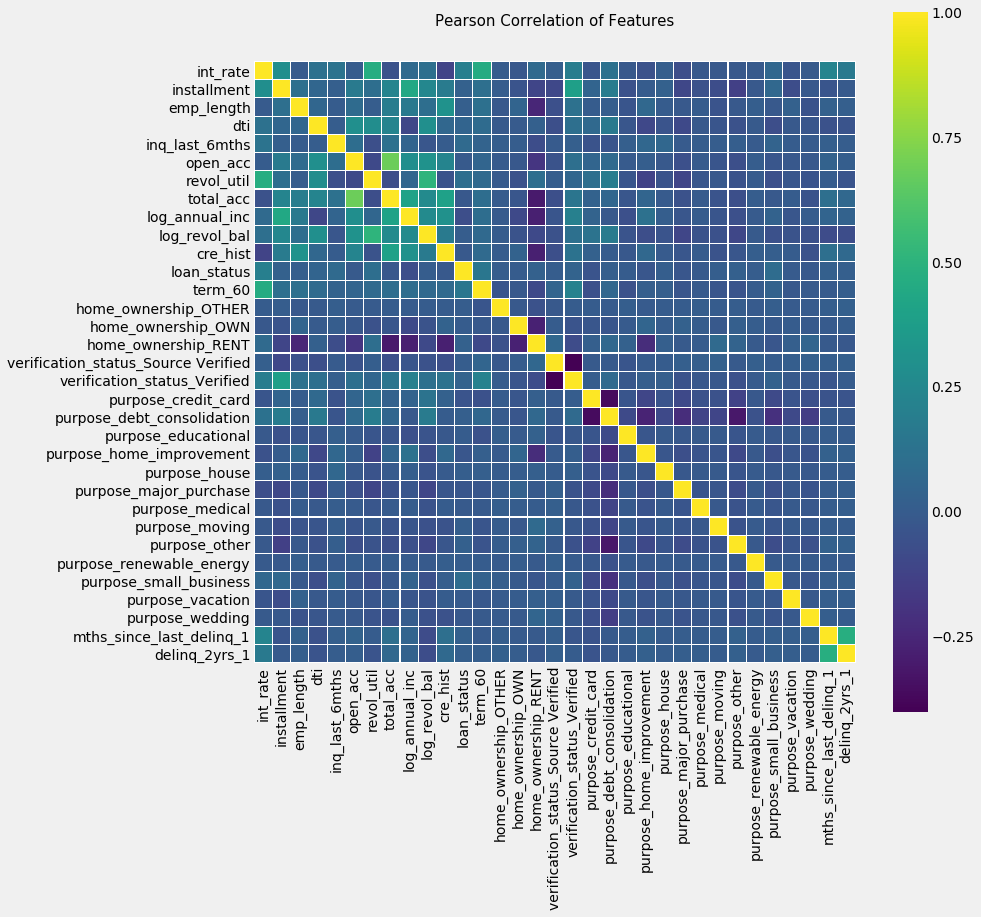

In [0]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_train.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white') #  annot=True
plt.show()

# 6. Model  building

1) Logistic Regression

2) Decision Tree

3) Random Forest

4) xgboosting

### 6.1 Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr = LogisticRegression()
lr.fit(df_train.drop("loan_status", axis = 1), df_train["loan_status"])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Evaluation of the Logistic Regression with confusion_matrix

In [0]:
score = lr.score(df_test.drop("loan_status", axis = 1), df_test["loan_status"])
print("The accuracy of the Logistic Regression: {:.2f}".format(score))

The accuracy of the Logistic Regression: 0.86


In [0]:
df_train["loan_status"].value_counts()/len(df_train)

0    0.856571
1    0.143429
Name: loan_status, dtype: float64

Since the data is very imbalanced, 85% and 14%, the accuracy is not a good model indicator. Next, I will consider the confusion matrix, and the roc to evaluate the model performance.

In [0]:
y_pred = lr.predict(df_test.drop("loan_status", axis = 1))
confusion_matrix(df_test["loan_status"], y_pred)

array([[6797,   17],
       [1125,   19]])

In [0]:
print("The True Positive: 6797")
print("The False Positive: 17")
print("The False Negative: 1125")
print("The True Negative: 19")

The True Positive: 6797
The False Positive: 17
The False Negative: 1125
The True Negative: 19


In [0]:
from sklearn.metrics import roc_auc_score, roc_curve
auc = roc_auc_score(lr.predict(df_test.drop("loan_status", axis = 1)), df_test["loan_status"])
auc

0.692884092120396

In [0]:
# roc curve with fpr, tpr
fpr, tpr, thre = roc_curve(lr.predict(df_test.drop("loan_status", axis = 1)), df_test["loan_status"])
ks = max(tpr-fpr)
ks

0.3857681842407922

auc = 0.693,ks = 0.385. Usually, a ks value > 0.3 indicating a usable model. 

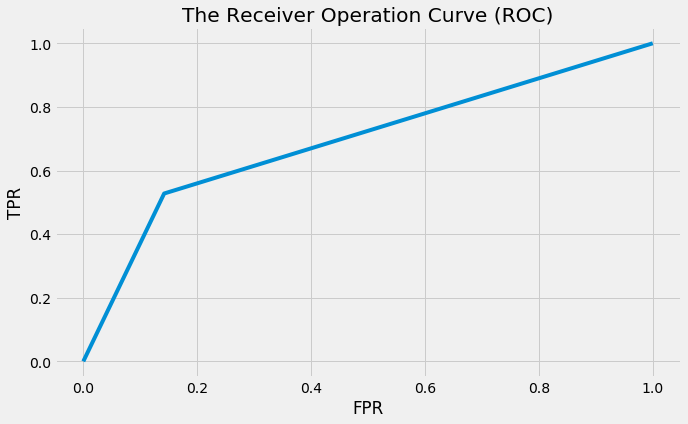

In [0]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.title("The Receiver Operation Curve (ROC)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

### 6.2 Random Forest

The Random Forest is a bagging method based on decisin tree.

随机森林的是以决策树为弱学习模型通过bagging方法构造出的强学习模型，它能容纳更多的信息，同时通过多模型投票，又能很好的避免过拟合的影响，它正好弥补了这一缺陷。这一模型可以作为评分卡的参考。

In [0]:
rfc = RandomForestClassifier(n_estimators = 50)
rfc.fit(df_train.drop("loan_status", axis = 1), df_train["loan_status"])
score = rfc.score(df_test.drop("loan_status", axis = 1), df_test["loan_status"])
score

0.8558683086202563

用网格搜索的方式优化逻辑回归森林模型：

回归森林模型中，n_estimators表示底层决策树个数，一般来说，树的个数越多，模型的稳定性越强，但是它的增大要受限于计算性能

In [0]:
# 网格搜索模型， 对随机森林中的DT个数经行遍历

from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
parameters = {"n_estimators": [5, 10, 20, 35, 50, 100]}

gs = GridSearchCV(estimator = rf, param_grid = parameters, scoring = "roc_auc", cv = 5, n_jobs = -1)

grid_result = gs.fit(df_train.drop("loan_status", axis = 1).values, df_train.loan_status.values)

In [0]:
grid_result.best_score_

0.681934382352303

In [0]:
grid_result.best_params_

{'n_estimators': 100}

From the result above, the accurayc is 85.6%, and the best roc_auc is 66.39% when n_estimators = 100.

### 6.3 xgboost

The xgboost is a boosting method based on decisin tree.

In [0]:
from xgboost import XGBClassifier
xgc = XGBClassifier()
xgc.fit(df_train.drop("loan_status", axis = 1), df_train["loan_status"])
score = xgc.score(df_test.drop("loan_status", axis = 1), df_test["loan_status"])
score

0.8568735863282232

In [0]:
auc_xgc = roc_auc_score(xgc.predict(df_test.drop("loan_status", axis = 1)), df_test["loan_status"])
auc_xgc

0.7444958598789454

# 7. Comparisons of the three models: Logistic Regression, Random Forest, xgboost

In [0]:
import pandas as pd
models = ["Logistic Regression", "Random Forest", "XGBoost"]
acc = [0.86, 0.855, 0.856]
auc = [0.692, 0.682, 0.744]

res = pd.DataFrame({"Models": models, "Accuracy": acc, "AUC": auc})
res

,Models,Accuracy,AUC
0,Logistic Regression,0.860,0.692
1,Random Forest,0.855,0.682
2,XGBoost,0.856,0.744


From the results above, the accuracy for the 3 models are very similar. Since the data is very imbalanced, the accuracy is not a indicator. 

The Aear Under Curve (ROC) is a good indicator of the model. Based on the AUC, the XGBoost performances best. 

# 7. Conclusion
From the discussion above, after a through data preprocessing and data engineering, 3 models, logistic regression, random forest, xgboost are created and evaluated. Based on the the AUC indicater, the XGBoost performances best. 

## useful reference:
URL_1 = 'https://blog.csdn.net/zs15321583801/article/details/89485951' **(example)**

URL_2 = "https://www.jianshu.com/p/a8037a38e219"

URL_3 = "https://zhuanlan.zhihu.com/p/21550547"

DataCamp = "https://www.datacamp.com/community/tutorials/machine-learning-python"